<a href="https://colab.research.google.com/github/jhoHawk1ng/Proyecti-final-Inteligencia-Artficial/blob/main/Proyecto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sb
 
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from scipy.spatial import distance

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import DistanceMetric

from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression

from sklearn.cluster import KMeans

from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_curve, auc

from sklearn import svm
from sklearn.svm import SVC
from sklearn.decomposition import PCA


#from sklearn.metrics import roc_curve,roc_auc_score

from scipy import interp

In [2]:
dataframe = pd.read_csv("heart.csv",sep=',')
dataframe.head(340)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
Datos = dataframe.dropna()
Datos.head(340)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
Datos.describe()# saca una pequeña descripcion del dataseet

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


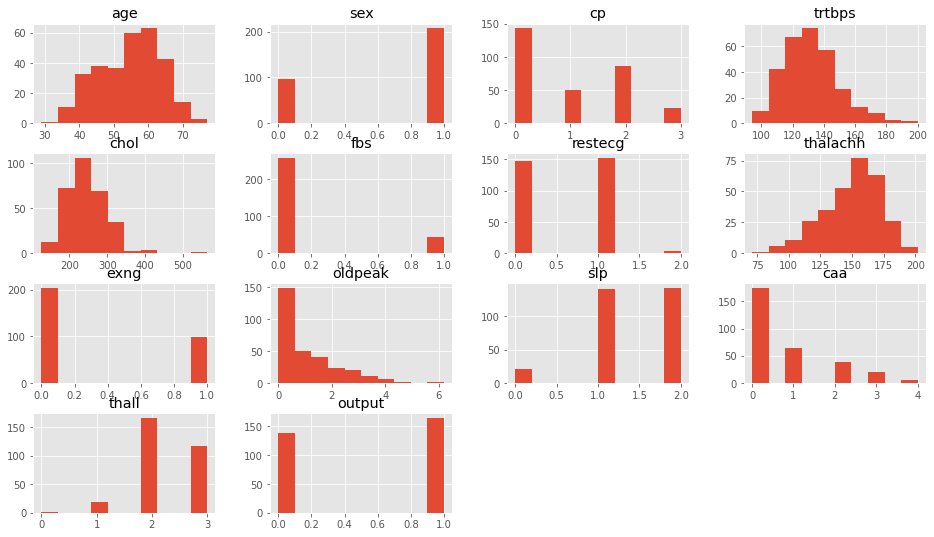

In [5]:
Datos.hist()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


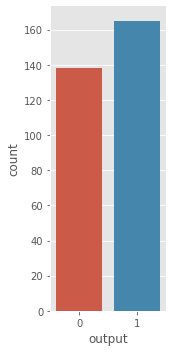

In [6]:
sb.factorplot('output',data=Datos,kind="count", aspect=0.5)

In [7]:
X = Datos[['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall']].values
y = Datos['output'].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.3)
# el modelo del escalizador lo entreno con el conjuntto de entrenamiento, con ese modelo escalizo los datos del conjunto de validamiento, entrenamiento y muestras nuevas que llegan
scaler = StandardScaler()
scaler.fit(X_train)# el fit de los datos solo se hace con el conjunto de entrenamiento!
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#Clasificación y predicción con el metodo Knn:

In [9]:
n_neighbors = 6
# ver https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html#sklearn.neighbors.DistanceMetric
#por ejemplo euclidean. manhattan. chebyshev. minkowski. wminkowski. seuclidean. mahalanobis. hamming
#import sklearn
#sorted(sklearn.neighbors.VALID_METRICS['brute'])
distance='minkowski'
knn = KNeighborsClassifier(n_neighbors,weights='uniform',metric=distance, metric_params=None,algorithm='brute')
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))# si da diferente de 1, quiere decir que hay muestras mal etiquetadas, se esta probando con el conjunto que se entreno
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))# se esta entrenando con el resto de datos que no fueron incluidos en el anterior grupo

Accuracy of K-NN classifier on training set: 0.83
Accuracy of K-NN classifier on test set: 0.87


In [10]:
predict_knn = knn.predict(X_test)
print("se presenta la matriz de confusion:")
print(confusion_matrix(y_test, predict_knn))# matriz de confusion en el conjunto de validacion
print(classification_report(y_test, predict_knn))

MCC_knn = matthews_corrcoef(y_test, predict_knn)
print("matthews_corrcoef", MCC_knn)

ACC_knn = accuracy_score(y_test, predict_knn)
print("Accuracy", ACC_knn)

se presenta la matriz de confusion:
[[36  8]
 [ 4 43]]
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        44
           1       0.84      0.91      0.88        47

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91

matthews_corrcoef 0.7380891995910035
Accuracy 0.8681318681318682


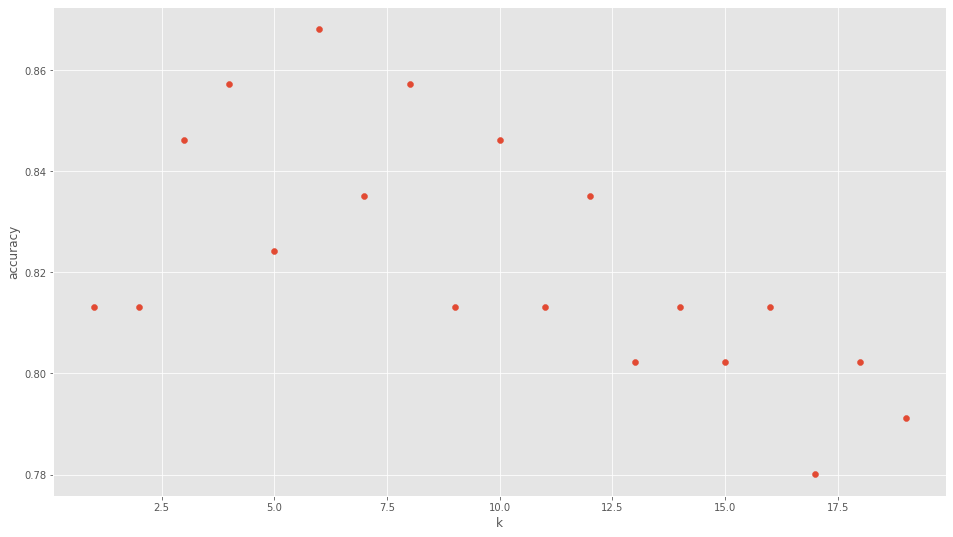

In [11]:
#obteniendo el mejor valor de K a partir del conjunto de validación con mejor accuracy
k_range = range(1, 20)
scores_knn = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k,weights='distance',metric=distance, metric_params=None,algorithm='brute')
    #knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores_knn.append(knn.score(X_test, y_test))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores_knn)

In [12]:
k_range = range(1, int(np.sqrt(len(y_train))))# k es la raiz cuadrada del numero de mueestras de mi problema, va de k=1 hasta el la parte entera de la raiz cuadrada
#por ejemplo euclidean. manhattan. chebyshev. minkowski. wminkowski. seuclidean. mahalanobis. hamming
#import sklearn
#sorted(sklearn.neighbors.VALID_METRICS['brute'])
distance='minkowski'#podemos hacer un for que recorra las distancias que queremos probar en un enfoque grid-search.

ACC=[]
MCC=[]
TPR=[]
FPR=[]

for k in k_range:#por ahora variemos K, 
    knn = KNeighborsClassifier(n_neighbors = k,weights='distance',metric=distance, metric_params=None,algorithm='brute')
    #knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    #Les toca hacer:
    #Hallar: Accuracy 
    ACC.append(knn.score(X_test, y_test))# saco los score
    #MCC 
    #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.matthews_corrcoef.html
    MCC.append(matthews_corrcoef(y_test, knn.predict(X_test)))

    #fpr, tpr, thresholds = metrics.roc_curve(y_test, scores_knn,pos_label=400)
    #TPR
    #FPR
#fpr, tpr, thresholds = metrics.roc_curve(y_test, scores_knn, pos_label=3)

[0.8131868131868132, 0.8131868131868132, 0.8461538461538461, 0.8571428571428571, 0.8241758241758241, 0.8681318681318682, 0.8351648351648352, 0.8571428571428571, 0.8131868131868132, 0.8461538461538461, 0.8131868131868132, 0.8351648351648352, 0.8021978021978022]


Text(0.5, 0, 'K')

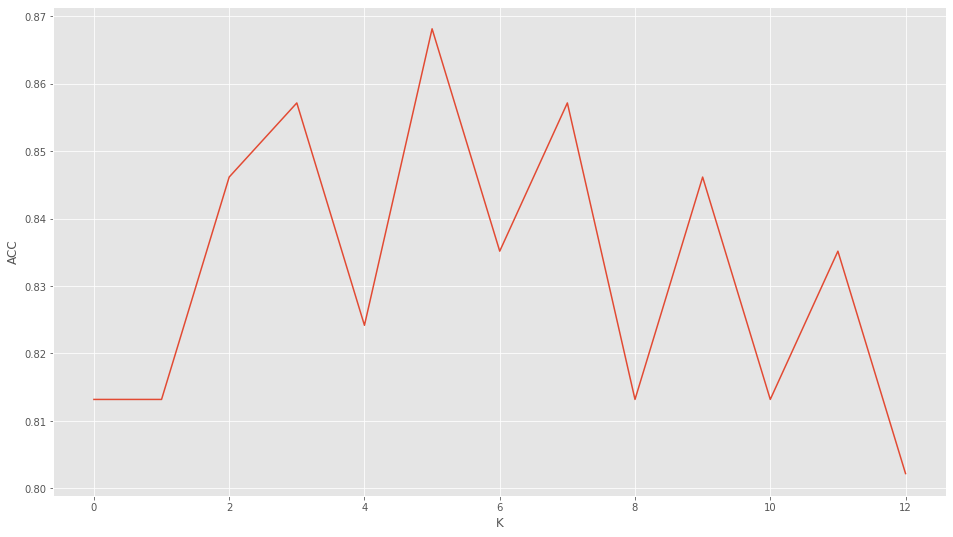

In [13]:
print(ACC)
plt.plot(ACC)
plt.ylabel('ACC')
plt.xlabel('K')

[0.6281431334622823, 0.6281431334622823, 0.6937843729664775, 0.7149169802331939, 0.6562815765264933, 0.7413681557748695, 0.676440635707054, 0.7212087068702119, 0.63627641706795, 0.7012526785324503, 0.6423690675571948, 0.6814763811219573, 0.6229910258818699]


Text(0.5, 0, 'K')

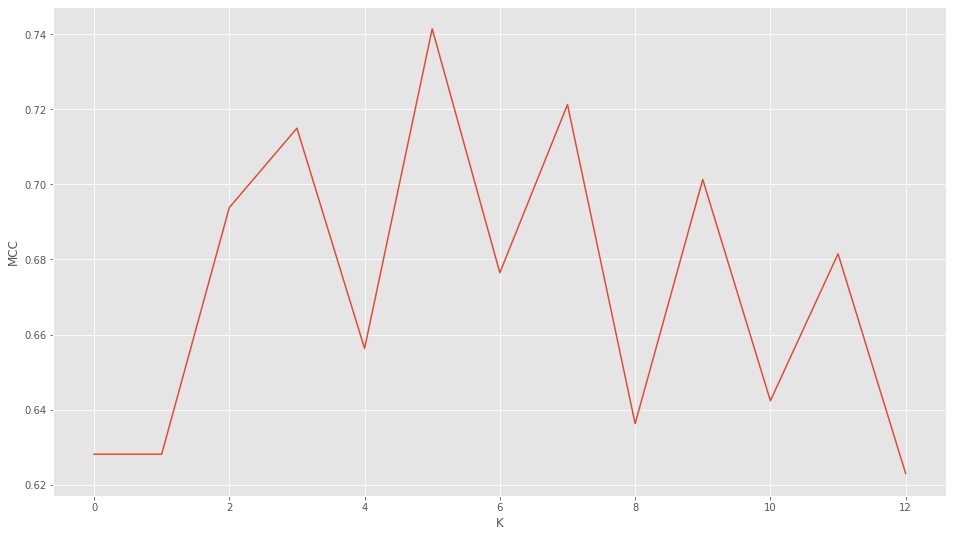

In [14]:
print(MCC)
plt.plot(MCC)
plt.ylabel('MCC')
plt.xlabel('K')

#Clasificacion y prediccion con maquinas de soporte con kernel rbf:

In [15]:
X = Datos[['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall']].values
y = Datos['output'].values

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.3)
# el modelo del escalizador lo entreno con el conjuntto de entrenamiento, con ese modelo escalizo los datos del conjunto de validamiento, entrenamiento y muestras nuevas que llegan
scaler = StandardScaler()
scaler.fit(X_train)# el fit de los datos solo se hace con el conjunto de entrenamiento!
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
from sklearn import svm
kernels=['linear', 'poly', 'rbf', 'sigmoid']
Kernel=2
msv = svm.SVC(kernel=kernels[Kernel],gamma = 0.001,C = 100)# C si es muy grande pues no va a regularizar, si es pequeño va a regularizar fuerte. 
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

msv.fit(X_train, y_train)

SVC(C=100, gamma=0.001)

In [18]:
y_test_predicted_kernel_rbf = msv.predict(X_test)
y_test_scores_kernel_rbf = msv.decision_function(X_test)# probabilidad de que realmente sea esa clase
MCC_kernel_rbf = matthews_corrcoef(y_test, y_test_predicted_kernel_rbf)
print("matthews_corrcoef", MCC_kernel_rbf)
ACC_kernel_rbf = accuracy_score(y_test, y_test_predicted_kernel_rbf)
print("Accuracy", ACC_kernel_rbf)

matthews_corrcoef 0.6814763811219573
Accuracy 0.8351648351648352


In [19]:
from sklearn.metrics import matthews_corrcoef
# se va a tomar k como un hiperparametro
gamma_range = range(1, 200)# k es la raiz cuadrada del numero de mueestras de mi problema, va de k=1 hasta el la parte entera de la raiz cuadrada

ACC_kernel_rbf_variacion=[]
MCC_kernel_rbf_variacion=[]
TPR_kernel_rbf_variacion=[]
FPR_kernel_rbf_variacion=[]

for gamma in gamma_range:#por ahora variemos K, 
    msv_rbf = svm.SVC(kernel=kernels[Kernel],gamma = 0.001,C = gamma)# C si es muy grande pues no va a regularizar, si es pequeño va a regularizar fuerte. 
    #knn = KNeighborsClassifier(n_neighbors = k)
    msv_rbf.fit(X_train, y_train)
    #Les toca hacer:
    #Hallar: Accuracy
    ACC_kernel_rbf_variacion.append(msv_rbf.score(X_test, y_test))# saco los score
    #MCC 
    #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.matthews_corrcoef.html
    MCC_kernel_rbf_variacion.append(matthews_corrcoef(y_test, msv_rbf.predict(X_test)))

ACC


Text(0.5, 0, 'gamma')

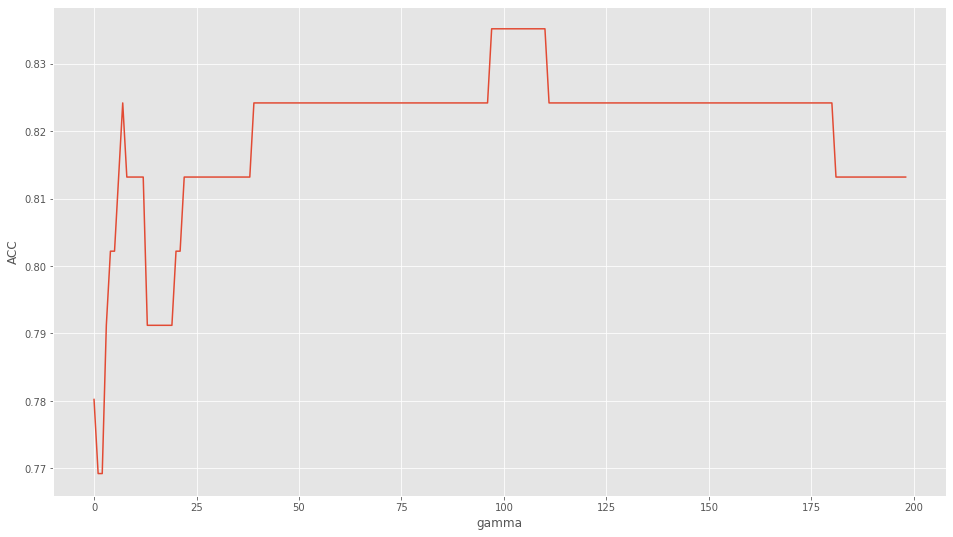

In [20]:
print("ACC")
plt.plot(ACC_kernel_rbf_variacion)
plt.ylabel('ACC')
plt.xlabel('gamma')

MCC


Text(0.5, 0, 'gamma')

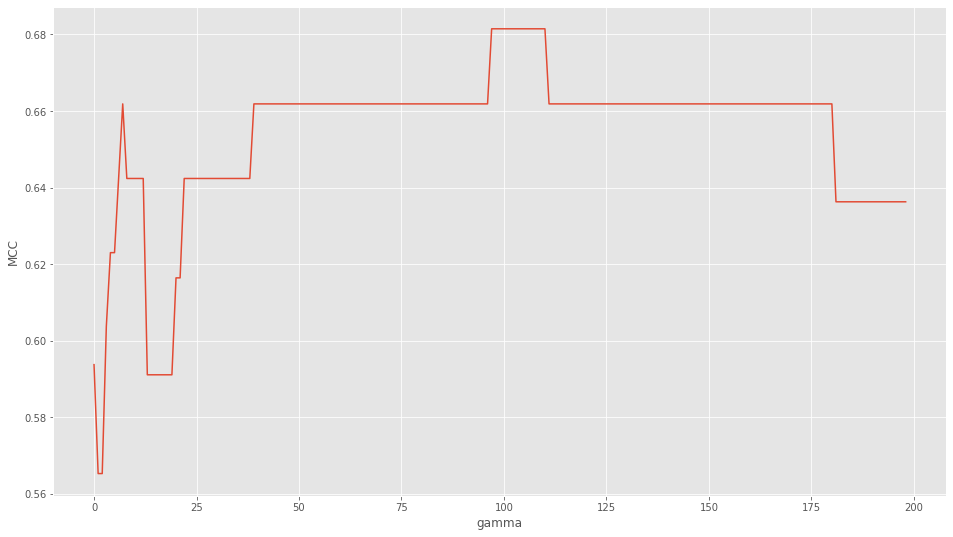

In [21]:
print("MCC")
plt.plot(MCC_kernel_rbf_variacion)
plt.ylabel('MCC')
plt.xlabel('gamma')

In [22]:
print("Matriz de confusion:")
print(confusion_matrix(y_test, y_test_predicted_kernel_rbf))# matriz de confusion en el conjunto de validacion
print(classification_report(y_test, y_test_predicted_kernel_rbf))

Matriz de confusion:
[[32 12]
 [ 3 44]]
              precision    recall  f1-score   support

           0       0.91      0.73      0.81        44
           1       0.79      0.94      0.85        47

    accuracy                           0.84        91
   macro avg       0.85      0.83      0.83        91
weighted avg       0.85      0.84      0.83        91



#Clasificacion y prediccion con maquinas de soporte con kernel rbf realizando PCA

In [23]:
X = Datos[['age','sex','cp','trtbps','chol','fbs','restecg','thalachh','exng','oldpeak','slp','caa','thall']].values
y = Datos['output'].values

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,test_size=0.3)
# el modelo del escalizador lo entreno con el conjuntto de entrenamiento, con ese modelo escalizo los datos del conjunto de validamiento, entrenamiento y muestras nuevas que llegan
scaler = StandardScaler()
scaler.fit(X_train)# el fit de los datos solo se hace con el conjunto de entrenamiento!
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
from sklearn import svm
kernels=['linear', 'poly', 'rbf', 'sigmoid']
Kernel=2
msv = svm.SVC(kernel=kernels[Kernel],gamma = 0.001,C = 100)# C si es muy grande pues no va a regularizar, si es pequeño va a regularizar fuerte. 
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC

msv.fit(X_train, y_train)

SVC(C=100, gamma=0.001)

In [26]:
y_test_predicted_kernel_rbf = msv.predict(X_test)
y_test_scores_kernel_rbf = msv.decision_function(X_test)# probabilidad de que realmente sea esa clase
MCC_kernel_rbf = matthews_corrcoef(y_test, y_test_predicted_kernel_rbf)
print("matthews_corrcoef", MCC_kernel_rbf)
ACC_kernel_rbf = accuracy_score(y_test, y_test_predicted_kernel_rbf)
print("Accuracy", ACC_kernel_rbf)

matthews_corrcoef 0.6814763811219573
Accuracy 0.8351648351648352


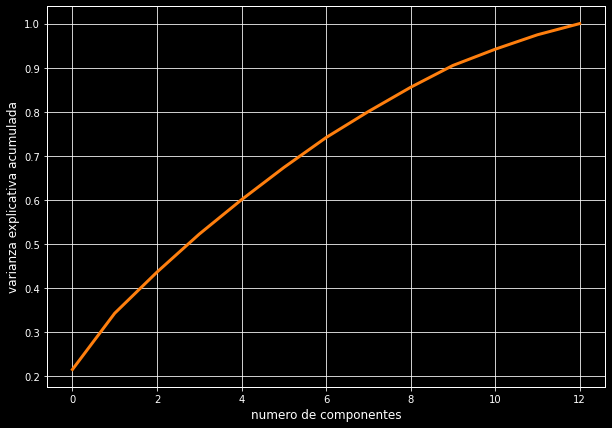

In [45]:
pca = PCA()
Xs=pca.fit(X_train)
plt.figure(figsize=(10,7))
plt.style.use("dark_background")
plt.plot(np.cumsum(pca.explained_variance_ratio_), color="tab:orange", linewidth=3)
plt.xlabel("numero de componentes")
plt.ylabel("varianza explicativa acumulada")
plt.show()

In [28]:
x_proj_train = pca.transform(X_train)[:,0:12]
x_proj_test  = pca.transform(X_test)[:,0:12]

In [29]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {
      "kernel":["rbf"],
      "gamma" :[1e-3,1e-4],
      "C"     :[1,10,100,1000],  
    },
  # segunda malla de parametros:
    {
        "kernel": ["lienar"],
        "C"     : [1,10,100,100],
    },
]
GridSearchCV = GridSearchCV(
    estimator = SVC(),
    param_grid = param_grid,
    cv = 5,
    scoring = "accuracy",
    refit = True,
    return_train_score= False,
)
GridSearchCV.fit(x_proj_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 333, in _dense_fit
    random_seed=random_seed,
  File "sklearn/svm/_libsvm.pyx", line 1

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 100], 'kernel': ['lienar']}],
             scoring='accuracy')

In [30]:
GridSearchCV.fit(x_proj_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 255, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 333, in _dense_fit
    random_seed=random_seed,
  File "sklearn/svm/_libsvm.pyx", line 1

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 100], 'kernel': ['lienar']}],
             scoring='accuracy')

In [31]:
GridSearchCV.cv_results_
GridSearchCV.best_estimator_

SVC(C=10, gamma=0.001)

In [32]:
GridSearchCV.best_score_



0.8347729789590254

In [33]:
GridSearchCV.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

In [34]:
GridSearchCV.predict(x_proj_train)

array([1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1])

In [35]:
y_test_kernel_rbf_grid = GridSearchCV.predict(x_proj_test)
print("Matriz de confusion:")
print(confusion_matrix(y_test, y_test_kernel_rbf_grid))# matriz de confusion en el conjunto de validacion
print(classification_report(y_test, y_test_kernel_rbf_grid))

Matriz de confusion:
[[31 13]
 [ 3 44]]
              precision    recall  f1-score   support

           0       0.91      0.70      0.79        44
           1       0.77      0.94      0.85        47

    accuracy                           0.82        91
   macro avg       0.84      0.82      0.82        91
weighted avg       0.84      0.82      0.82        91



In [36]:
y_test_kernel_rbf_grid = GridSearchCV.predict(x_proj_test)
print("Matriz de confusion:")
print(confusion_matrix(y_test, y_test_kernel_rbf_grid))# matriz de confusion en el conjunto de validacion
print(classification_report(y_test, y_test_kernel_rbf_grid))

Matriz de confusion:
[[31 13]
 [ 3 44]]
              precision    recall  f1-score   support

           0       0.91      0.70      0.79        44
           1       0.77      0.94      0.85        47

    accuracy                           0.82        91
   macro avg       0.84      0.82      0.82        91
weighted avg       0.84      0.82      0.82        91



In [37]:
from sklearn.metrics import matthews_corrcoef
# se va a tomar k como un hiperparametro
gamma_range = range(1, 200)# k es la raiz cuadrada del numero de mueestras de mi problema, va de k=1 hasta el la parte entera de la raiz cuadrada

ACC_kernel_rbf_variacion=[]
MCC_kernel_rbf_variacion=[]
TPR_kernel_rbf_variacion=[]
FPR_kernel_rbf_variacion=[]

for gamma in gamma_range:#por ahora variemos K, 
    msv_rbf = svm.SVC(kernel=kernels[Kernel],gamma = 0.001,C = gamma)# C si es muy grande pues no va a regularizar, si es pequeño va a regularizar fuerte. 
    #knn = KNeighborsClassifier(n_neighbors = k)
    msv_rbf.fit(X_train, y_train)
    #Les toca hacer:
    #Hallar: Accuracy
    ACC_kernel_rbf_variacion.append(msv_rbf.score(X_test, y_test))# saco los score
    #MCC 
    #https://scikit-learn.org/stable/modules/generated/sklearn.metrics.matthews_corrcoef.html
    MCC_kernel_rbf_variacion.append(matthews_corrcoef(y_test, msv_rbf.predict(X_test)))

ACC


Text(0.5, 0, 'gamma')

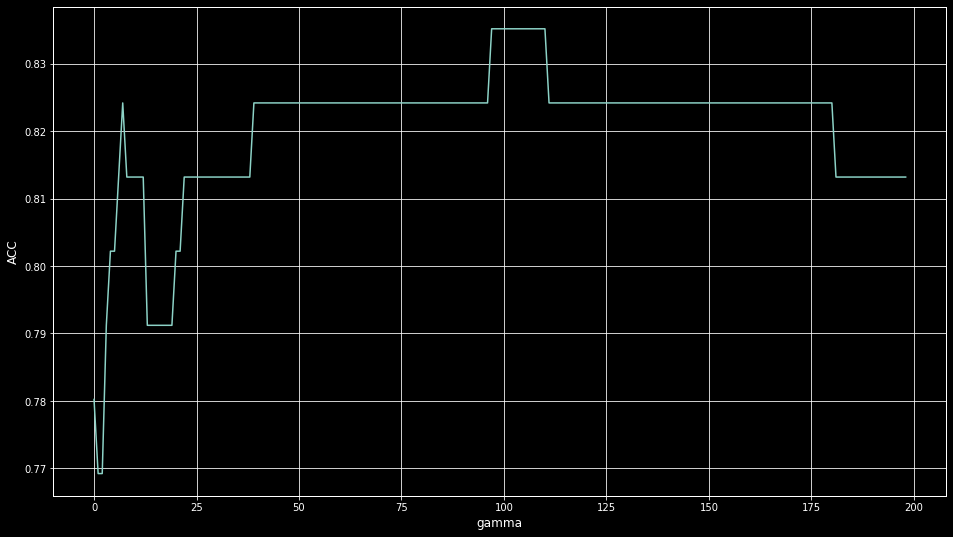

In [38]:
print("ACC")
plt.plot(ACC_kernel_rbf_variacion)
plt.ylabel('ACC')
plt.xlabel('gamma')

MCC


Text(0.5, 0, 'gamma')

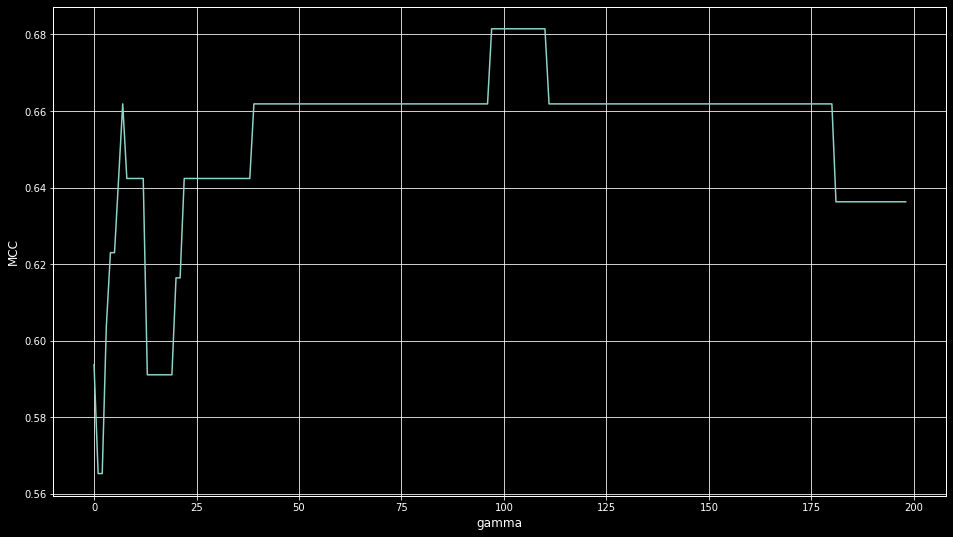

In [39]:
print("MCC")
plt.plot(MCC_kernel_rbf_variacion)
plt.ylabel('MCC')
plt.xlabel('gamma')

In [40]:
print("Matriz de confusion:")
print(confusion_matrix(y_test, y_test_predicted_kernel_rbf))# matriz de confusion en el conjunto de validacion
print(classification_report(y_test, y_test_predicted_kernel_rbf))

Matriz de confusion:
[[32 12]
 [ 3 44]]
              precision    recall  f1-score   support

           0       0.91      0.73      0.81        44
           1       0.79      0.94      0.85        47

    accuracy                           0.84        91
   macro avg       0.85      0.83      0.83        91
weighted avg       0.85      0.84      0.83        91



# Metodo de clasificacion OVO:




In [41]:
from sklearn.linear_model import LogisticRegression #https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.multiclass import OneVsOneClassifier # https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsOneClassifier.html
ovr = LogisticRegression(random_state=0,solver = 'liblinear',tol=0.00001,multi_class='ovr',max_iter=100)# clasificador de tipo clase, multiclase de tipo OVR con un maximo de iteraciones 100
ovr.fit(X_train, y_train)

predict_ovr=ovr.predict(X_test)


In [42]:
print("matriz de confusion:")
print(confusion_matrix(y_test, predict_ovr))# matriz de confusion en el conjunto de validacion
print(classification_report(y_test, predict_ovr))

MCC_ovr = matthews_corrcoef(y_test, predict_ovr)
print("matthews_corrcoef", MCC_ovr)

ACC_ovr = accuracy_score(y_test, predict_ovr)
print("Accuracy", ACC_ovr)

matriz de confusion:
[[32 12]
 [ 5 42]]
              precision    recall  f1-score   support

           0       0.86      0.73      0.79        44
           1       0.78      0.89      0.83        47

    accuracy                           0.81        91
   macro avg       0.82      0.81      0.81        91
weighted avg       0.82      0.81      0.81        91

matthews_corrcoef 0.6316725645438963
Accuracy 0.8131868131868132


In [43]:
predict_ovr = ovr.predict(X_test)
ACC_ovr = accuracy_score(y_test, predict_ovr)
print("Accuracy", ACC_ovr)

Accuracy 0.8131868131868132


In [44]:
roc_auc_score(y_test, predict_ovr, multi_class='ovr')

0.8104448742746615